## Glassdoor Reviews Dataset - Data Preprocessing 

**Glassdoor reviews dataset form Kaggle: https://www.kaggle.com/datasets/davidgauthier/glassdoor-job-reviews/data**

In [ ]:
# Load dataset from kaggle
import os
import sys
import csv
import pandas as pd
import numpy as np

# Load dataset raw textual data into structured data more suitable for NLP tasks 
df = pd.read_csv("glassdoor_data/glassdoor_reviews.csv") 

# Display first few rows
df.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


In [3]:
# Check column types and missing values 
df.info() 
df.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838566 entries, 0 to 838565
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   firm                 838566 non-null  object 
 1   date_review          838566 non-null  object 
 2   job_title            838566 non-null  object 
 3   current              838566 non-null  object 
 4   location             541223 non-null  object 
 5   overall_rating       838566 non-null  int64  
 6   work_life_balance    688672 non-null  float64
 7   culture_values       647193 non-null  float64
 8   diversity_inclusion  136066 non-null  float64
 9   career_opp           691065 non-null  float64
 10  comp_benefits        688484 non-null  float64
 11  senior_mgmt          682690 non-null  float64
 12  recommend            838566 non-null  object 
 13  ceo_approv           838566 non-null  object 
 14  outlook              838566 non-null  object 
 15  headline         

firm                        0
date_review                 0
job_title                   0
current                     0
location               297343
overall_rating              0
work_life_balance      149894
culture_values         191373
diversity_inclusion    702500
career_opp             147501
comp_benefits          150082
senior_mgmt            155876
recommend                   0
ceo_approv                  0
outlook                     0
headline                 2590
pros                        2
cons                       13
dtype: int64

What can we see?
- the dataset has 838566 rows and 18 columns. 
- data types: float64(6), int64(1), object(11)
- 

In [4]:
# Check column names
df.columns

Index(['firm', 'date_review', 'job_title', 'current', 'location',
       'overall_rating', 'work_life_balance', 'culture_values',
       'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt',
       'recommend', 'ceo_approv', 'outlook', 'headline', 'pros', 'cons'],
      dtype='object')

In [5]:
# rename column names for easier access
df.columns = ['Company' , 'Date Posted', 'Job Title', 'Current Employee', 'Location', 'Overall Rating','Work/Life Balance', 'Company Culture', 'Diversity Inclusion', 'Career Opportunity' , 'Company Benefits', 'Management', 'Recommend to a Friend ', 'CEO Approval', 'Business Outlook', 'Post Title' , 'Pros', 'Cons']
df.columns

Index(['Company', 'Date Posted', 'Job Title', 'Current Employee', 'Location',
       'Overall Rating', 'Work/Life Balance', 'Company Culture',
       'Diversity Inclusion', 'Career Opportunity', 'Company Benefits',
       'Management', 'Recommend to a Friend ', 'CEO Approval',
       'Business Outlook', 'Post Title', 'Pros', 'Cons'],
      dtype='object')

In [6]:
missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (missing / len(df)) * 100
missing_df = pd.DataFrame({'missing_count': missing, 'percent_missing': percent_missing})
print(missing_df.head(10))


                     missing_count  percent_missing
Diversity Inclusion         702500        83.773967
Location                    297343        35.458509
Company Culture             191373        22.821459
Management                  155876        18.588400
Company Benefits            150082        17.897458
Work/Life Balance           149894        17.875039
Career Opportunity          147501        17.589671
Post Title                    2590         0.308861
Cons                            13         0.001550
Pros                             2         0.000239


we can see above, we have least amount of missing values for pros and cons therefore we can easily drop these rows. 

but for the ratings column, they have a high percentage so we can calculate the median

for columns such as location, and post title we can add 'unknown' and 'no title' 

In [7]:
# Drop rows with missing pros and missing cons

#first check how many rows have missing pros and/or cons
missing_pros = df['Pros'].isnull().sum()
missing_cons = df['Cons'].isnull().sum()
print('missing pros:', missing_pros)
print('missing cons:', missing_cons)

missing pros: 2
missing cons: 13


In [8]:
# drop rows with missing pros and/or cons
df = df.dropna(subset=['Pros', 'Cons'])
print('missing pros:', df['Pros'].isnull().sum())
print('missing cons:', df['Cons'].isnull().sum())


missing pros: 0
missing cons: 0


In [9]:
# check for duplicates
df.duplicated().sum()
print (f"Number of duplicates: {df.duplicated().sum()}")

# Proper duplicate check
duplicates = df[df.duplicated(keep=False)]
print("Number of exact duplicates:", duplicates.shape[0])
print(duplicates.head())

# df.drop_duplicates(inplace=True)
# print (f"Number of duplicates after dropping: {df.duplicated().sum()}")
# df.shape

Number of duplicates: 33515
Number of exact duplicates: 67015
     Company Date Posted              Job Title  \
1231    ASDA  2010-10-29           Asda Manager   
1232    ASDA  2010-10-29           Asda Manager   
1271    ASDA  2013-04-24   Shop Floor Assistant   
1272    ASDA  2013-04-24   Shop Floor Assistant   
1291    ASDA  2013-11-20                 Picker   

                        Current Employee                  Location  \
1231                     Former Employee                       NaN   
1232                     Former Employee                       NaN   
1271  Current Employee, more than 1 year                       NaN   
1272  Current Employee, more than 1 year                       NaN   
1291  Current Employee, more than 1 year  London, England, England   

      Overall Rating  Work/Life Balance  Company Culture  Diversity Inclusion  \
1231               5                5.0              NaN                  NaN   
1232               5                5.0         

In [10]:
duplicates_specific_cols = df[df.duplicated(subset=['Company', 'Job Title', 'Pros', 'Cons' ], keep=False)]
print("Number of duplicates with specific columns:", duplicates_specific_cols.shape[0])
print(duplicates_specific_cols.head())

Number of duplicates with specific columns: 69880
     Company Date Posted              Job Title  \
1231    ASDA  2010-10-29           Asda Manager   
1232    ASDA  2010-10-29           Asda Manager   
1271    ASDA  2013-04-24   Shop Floor Assistant   
1272    ASDA  2013-04-24   Shop Floor Assistant   
1291    ASDA  2013-11-20                 Picker   

                        Current Employee                  Location  \
1231                     Former Employee                       NaN   
1232                     Former Employee                       NaN   
1271  Current Employee, more than 1 year                       NaN   
1272  Current Employee, more than 1 year                       NaN   
1291  Current Employee, more than 1 year  London, England, England   

      Overall Rating  Work/Life Balance  Company Culture  Diversity Inclusion  \
1231               5                5.0              NaN                  NaN   
1232               5                5.0              NaN    

In [ ]:
duplicate_pairs = df[df.duplicated(subset=[
    'Company', 'Job Title', 'Date Posted', 'Pros', 'Cons'
], keep=False)].sort_values(by=['Company', 'Date Posted'])

# Inspect visually:
with pd.option_context('display.max_colwidth', None):
    print(duplicates_specific_cols[['Company', 'Date Posted', 'Job Title', 'Pros', 'Cons']].head(20))
x   

     Company Date Posted                       Job Title  \
1231    ASDA  2010-10-29                    Asda Manager   
1232    ASDA  2010-10-29                    Asda Manager   
1271    ASDA  2013-04-24            Shop Floor Assistant   
1272    ASDA  2013-04-24            Shop Floor Assistant   
1291    ASDA  2013-11-20                          Picker   
1292    ASDA  2013-11-20                          Picker   
1337    ASDA  2014-05-24   Shop Floor Assistant (Nights)   
1338    ASDA  2014-05-24   Shop Floor Assistant (Nights)   
1399    ASDA  2014-06-16                        Designer   
1400    ASDA  2014-06-16                        Designer   
1421    ASDA  2014-07-20              Department Manager   
1422    ASDA  2014-07-20              Department Manager   
1461    ASDA  2014-09-22                                   
1462    ASDA  2014-09-22                                   
1481    ASDA  2014-10-30            Shop Floor Assistant   
1482    ASDA  2014-10-30            Shop

no we can see true duplicates, here we can manually check if they are truly duplicate or worded slightly different.
if there are only subtle differences then treat it as separate reviews 

In [12]:
duplicates_df = df[df.duplicated(subset=['Company', 'Date Posted', 'Job Title', 'Pros', 'Cons'], keep=False)]

# Check side-by-side for clearer differences
duplicates_df.sort_values(['Company', 'Date Posted', 'Job Title']).head(20)

duplicates_df.shape


(69852, 18)

In [13]:
# Remove duplicates based on key columns
df_cleaned = df.drop_duplicates(subset=['Company', 'Date Posted', 'Job Title', 'Pros', 'Cons'], keep='first').reset_index(drop=True)

print("Original dataset shape:", df.shape)
print("Dataset shape after removing duplicates:", df_cleaned.shape)

Original dataset shape: (838551, 18)
Dataset shape after removing duplicates: (803616, 18)


In [14]:
duplicates_remaining = df_cleaned[df_cleaned.duplicated(subset=['Company', 'Date Posted', 'Job Title', 'Pros', 'Cons'], keep=False)]
print("Remaining duplicates after cleaning:", duplicates_remaining.shape[0])


Remaining duplicates after cleaning: 0


In [15]:
# filling missing values from rating columns with median

rating_columns = ['Overall Rating', 'Work/Life Balance', 'Company Culture', 'Diversity Inclusion', 'Career Opportunity', 'Company Benefits', 'Management', 'Recommend to a Friend ', 'CEO Approval', 'Business Outlook']



In [16]:
companies = df['Company'].value_counts()
list_of_companies_order = companies.sort_values(ascending = False)
top_50_companies = list_of_companies_order.head(50)

# Create a new DataFrame with the top 50 companies
top_50_df = pd.DataFrame({'Company': top_50_companies.index, 'Frequency': top_50_companies.values})

# Print the new DataFrame
print(top_50_df)

                   Company  Frequency
0                      IBM      60436
1               McDonald-s      49450
2                 Deloitte      46994
3                       EY      34048
4                      PwC      33227
5                   Oracle      31941
6                Microsoft      26675
7               J-P-Morgan      25814
8                     KPMG      24815
9                    Apple      20797
10                    Citi      18726
11                  Google      15995
12                     SAP      14343
13           HSBC-Holdings      13893
14                   Tesco      12149
15  Marriott-International      10408
16                Barclays       9710
17         Thomson-Reuters       9553
18        American-Express       9348
19          Morgan-Stanley       9093
20           Goldman-Sachs       8808
21                Vodafone       8321
22              Salesforce       8234
23               Pizza-Hut       7592
24              BNY-Mellon       6630
25          

#### Handling Missing values from rating columns ####

In [17]:

rating_columns = ['Work/Life Balance', 'Company Culture', 'Career Opportunity', 
                    'Company Benefits', 'Management']
df[df[rating_columns].isnull().all(axis = 1)].shape[0]

142214

from here we can see that, almost 142k rows have no rating so we calculate skewness to determine how to decide a average score for the company. 

How skewness is measured: 

|Skewness Value|	Interpretation|	Recommended Imputation|
|:--------:|:--------:|:---------:|
|0 (between -0.5 and 0.5)|	Fairly symmetric (normal-like distribution)|	Use Mean|
|Moderate Skewness (-1 to -0.5 or 0.5 to 1)|	Slightly skewed |	Can use either Mean or Median (Check histograms)|
|Highly Skewed (>1 or < -1)|	Strongly skewed |Use Median (Resistant to outliers)|



In [18]:
# Check skewness of rating columns
df[rating_columns].skew()
print(df[rating_columns].skew())

Work/Life Balance    -0.375132
Company Culture      -0.614974
Career Opportunity   -0.459522
Company Benefits     -0.379058
Management           -0.239280
dtype: float64


Since the values are between -0.2 to -0.6, therefore the dataset is not strongly skewed, and can be interpreted as fairly symmetrical. 

So we will use the mean to get the average rating to fill the missing values. 

In [ ]:
for col in rating_columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())
    #print(f"Filled {col} with Mean (low skewness).")

    mean_val = df_cleaned[col].mean()
    df_cleaned[col] = df_cleaned[col].apply(lambda x: round(mean_val) if pd.isna(x) else x).astype(int)

Filled Work/Life Balance with Mean (low skewness).
Filled Company Culture with Mean (low skewness).
Filled Career Opportunity with Mean (low skewness).
Filled Company Benefits with Mean (low skewness).
Filled Management with Mean (low skewness).


In [20]:
# Missing values in locations and post title 


df_cleaned['Location'] = df_cleaned['Location'].fillna('Unknown')

df_cleaned['Post Title'] = df_cleaned['Post Title'].fillna('No Title')

# drop columns that are not needed
df_cleaned = df_cleaned.drop(columns=['Current Employee', 'Recommend to a Friend ', 'CEO Approval', 'Business Outlook'])


Unqiue values and Balance analysis
- understand how many unique job titles there are which of them dominate the dataset. 

In [21]:
print("Number of unique job titles:", df_cleaned['Job Title'].nunique())

# Top 10 most common job titles
print(df_cleaned['Job Title'].value_counts().head(10))

Number of unique job titles: 62274
Job Title
Anonymous Employee    155725
                       75684
Manager                14203
Consultant             11736
Software Engineer      10079
Associate               9991
Senior Consultant       9442
Analyst                 9302
Crew Member             7714
Senior Associate        6457
Name: count, dtype: int64


^ anonymous employee and blank employee can talk abt it on the paper on how i dealt with it. 

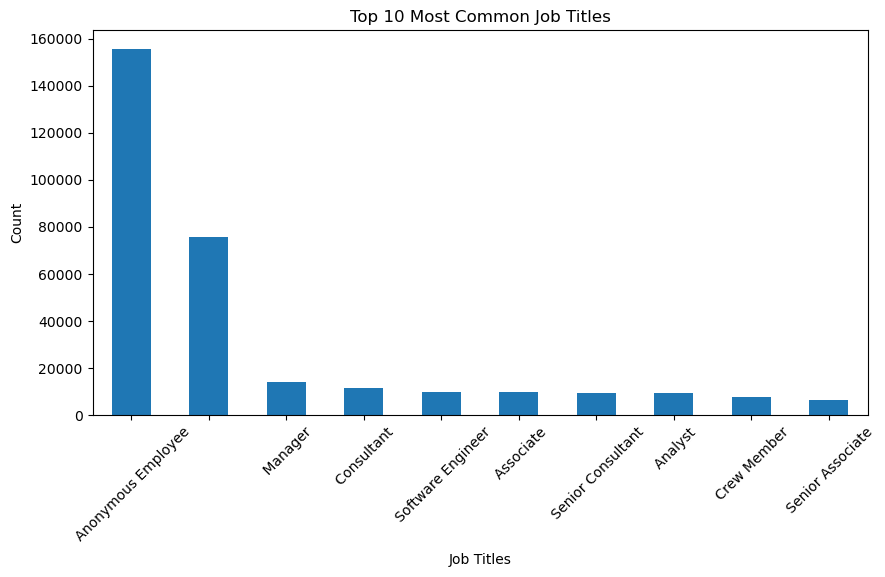

In [22]:
import matplotlib.pyplot as plt
top_jobs = df_cleaned['Job Title'].value_counts().head(20)

top_jobs.head(10).plot(kind='bar', figsize=(10,5), title="Top 10 Most Common Job Titles")
plt.xlabel("Job Titles")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [23]:
# Group by Job Title and calculate the average Overall Rating
job_ratings = df_cleaned.groupby('Job Title')['Overall Rating'].mean()

# Get the 10 highest and 10 lowest-rated job titles
job_ratings_highest = job_ratings.sort_values(ascending=False).head(10)
job_ratings_lowest = job_ratings.sort_values(ascending=True).head(10)

print("Top 10 Highest Rated Job Titles:\n", job_ratings_highest)
print("\nBottom 10 Lowest Rated Job Titles:\n", job_ratings_lowest)


Top 10 Highest Rated Job Titles:
 Job Title
Labotory Technician                                  5.0
Quantitative Risk Associate                          5.0
Quantitative Marketing Manager                       5.0
Delievery Boy                                        5.0
Delicatessen                                         5.0
Deli Utility Clerk                                   5.0
Deli Counter Customer Service                        5.0
Quantitative Researcher, Associate                   5.0
Deli Clerk/Bakery Assistant/Chicken Fryer            5.0
Quantitative and Index Funds Structurer Assistant    5.0
Name: Overall Rating, dtype: float64

Bottom 10 Lowest Rated Job Titles:
 Job Title
Sr Auditor                            1.0
Pharmacy Services Assistant           1.0
Stock/Receiving                       1.0
Capital Markets Operations Officer    1.0
Capital Markets Director              1.0
Noodle Ambassador                     1.0
Stockflow                             1.0
Fresher 

difference between highest and lowest? 

- what are the common job themes in the higher rated salaries and lower
- what is the pattern? are they low paying, high stress jobs etc?

Employee ratings 

In [24]:
print(df_cleaned[['Overall Rating', 'Work/Life Balance', 'Company Culture', 'Diversity Inclusion', 
                  'Career Opportunity', 'Company Benefits', 'Management']].describe())


       Overall Rating  Work/Life Balance  Company Culture  \
count   803616.000000      803616.000000    803616.000000   
mean         3.657233           3.374861         3.590890   
std          1.176907           1.184001         1.164416   
min          1.000000           1.000000         1.000000   
25%          3.000000           3.000000         3.000000   
50%          4.000000           3.374861         3.590890   
75%          5.000000           4.000000         5.000000   
max          5.000000           5.000000         5.000000   

       Diversity Inclusion  Career Opportunity  Company Benefits  \
count        130597.000000       803616.000000     803616.000000   
mean              3.964563            3.459207          3.402606   
std               1.193043            1.156432          1.106016   
min               1.000000            1.000000          1.000000   
25%               3.000000            3.000000          3.000000   
50%               4.000000            3.45

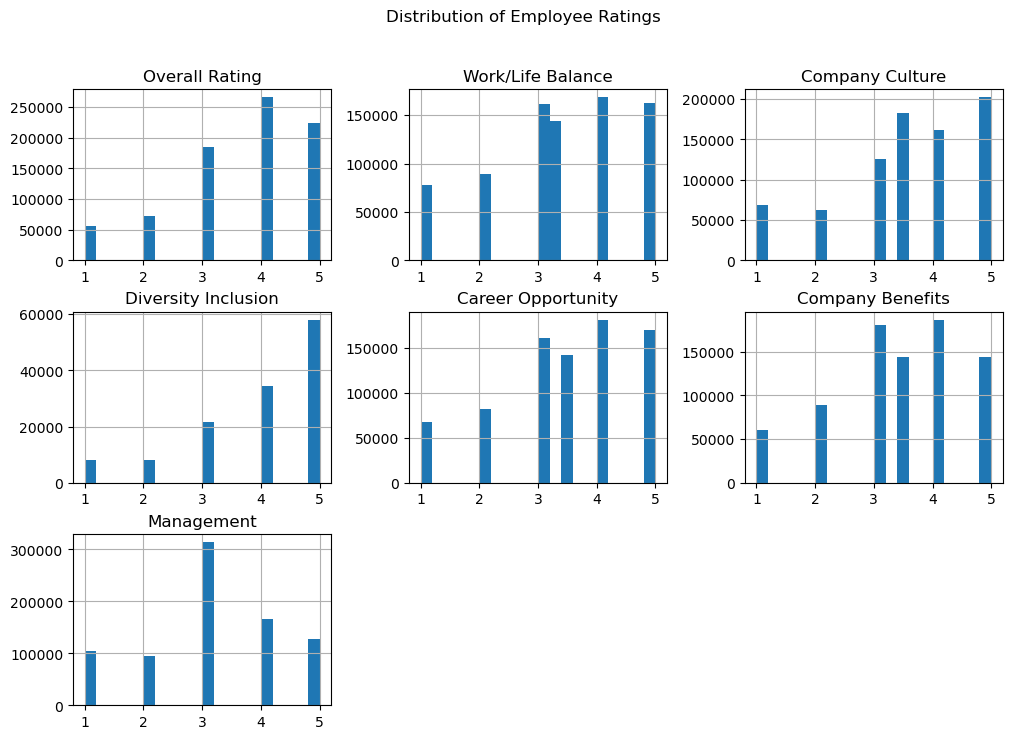

In [ ]:
df_cleaned[['Overall Rating', 'Work/Life Balance', 'Company Culture', 'Diversity Inclusion', 
            'Career Opportunity', 'Company Benefits', 'Management']].hist(figsize=(12,8), bins=20)
plt.suptitle("Distribution of Employee Ratings")
plt.show()


In [ ]:
# diversity inlusion column has a lot of missing values
# find out how many missing values are there
missing_diversity = df_cleaned['Diversity Inclusion'].isnull().sum()
print('missing diversity inclusion:', missing_diversity)

# Change float values to int
# Only convert non-null values to int, leave NaNs untouched
df_cleaned['Diversity Inclusion'] = df_cleaned['Diversity Inclusion'].apply(
    lambda x: int(round(x)) if pd.notnull(x) else x)


missing diversity inclusion: 673019


In [26]:
df_cleaned['pros_length'] = df_cleaned['Pros'].apply(lambda x: len(str(x).split()))
df_cleaned['cons_length'] = df_cleaned['Cons'].apply(lambda x: len(str(x).split()))

print("Pros review length statistics:")
print(df_cleaned['pros_length'].describe())

print("Cons review length statistics:")
print(df_cleaned['cons_length'].describe())


Pros review length statistics:
count    803616.00000
mean         14.93229
std          19.68836
min           1.00000
25%           6.00000
50%           9.00000
75%          17.00000
max        3153.00000
Name: pros_length, dtype: float64
Cons review length statistics:
count    803616.000000
mean         21.029146
std          39.902080
min           1.000000
25%           6.000000
50%           9.000000
75%          21.000000
max        1917.000000
Name: cons_length, dtype: float64


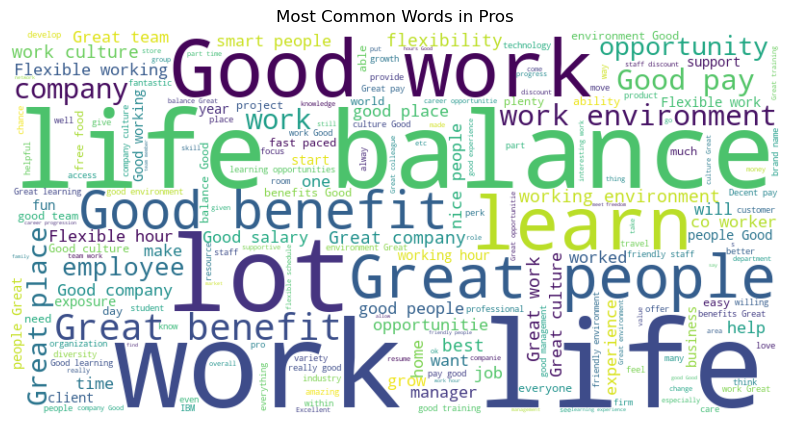

In [28]:
from wordcloud import WordCloud

text = ' '.join(df_cleaned['Pros'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Pros")
plt.show()


Lots of filler word and stop words such as 'lots', 'within', 'co worker' etc 
how can we pre process the data so that we can accurately see what are the most common pros and cons. 

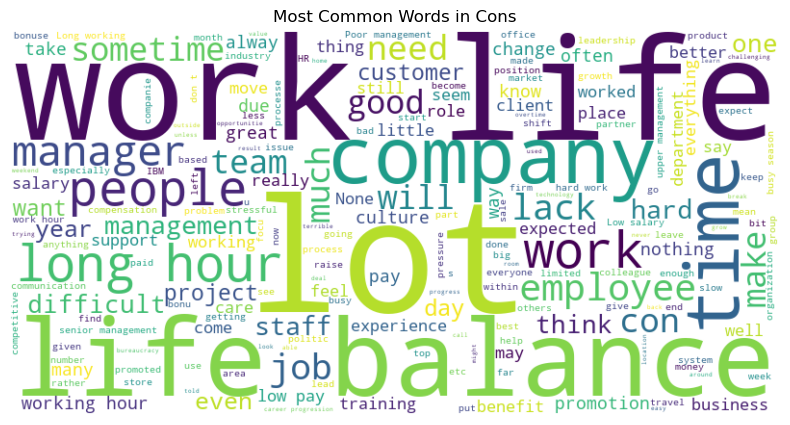

In [29]:
text = ' '.join(df_cleaned['Cons'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Cons")
plt.show()

In [ ]:
df_cleaned.to_csv('cleaned_glassdoor_reviews.csv', index=False)

In [38]:
# Check if cleaned dataset has no missing values
print(df_cleaned.isnull().sum())

Company                     0
Date Posted                 0
Job Title                   0
Location                    0
Overall Rating              0
Work/Life Balance           0
Company Culture             0
Diversity Inclusion    673019
Career Opportunity          0
Company Benefits            0
Management                  0
Post Title                  0
Pros                        0
Cons                        0
pros_length                 0
cons_length                 0
dtype: int64


Now we can say our dataset is clean! onto text preprocessing

---